In [53]:
# Importando todas as bibliotecas necessárias:
import numpy as np
from math import sqrt
import matplotlib.pyplot as plt

# Importando as bibliotecas Scikit Learn:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

# Importando as métricas necessárias:
from sklearn.metrics import silhouette_score


Crie um conjunto de dados.

In [38]:
# Definindo o número de amostras:
N = 1000

# Criando o dataset:
X, y = make_blobs(n_samples=N, n_features=2, centers=4, cluster_std=1,
                  center_box=(-10.0, 10.0), shuffle=True, random_state=1)

**A**. Plote os dados do conjunto de testes.

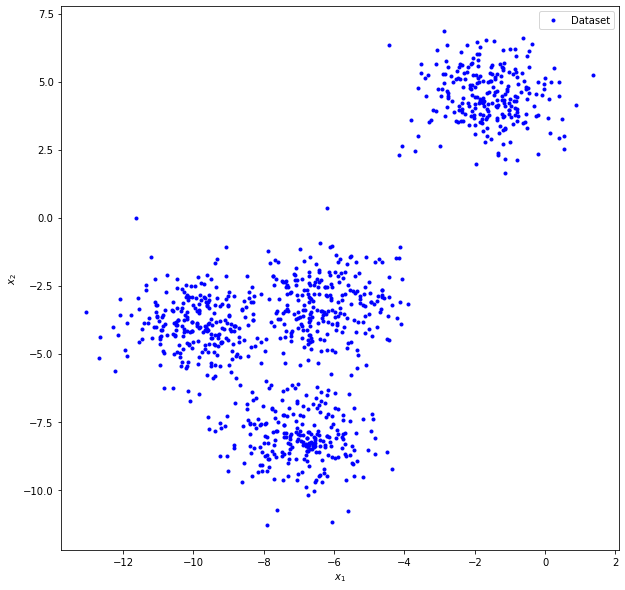

In [39]:
# Plotagem do dataset:
fig = plt.figure(figsize=(10, 10))
plt.plot(X[:,0], X[:,1], 'b.', label='Dataset')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.legend()
plt.show()

**B**. Visualmente, quantos clusters você acha que seriam necessários para agrupar os dados?

*Aparantemente seriam necesários 4 clusters. Pois há 4 conjuntos bem delienados.*

**C**. Utilizando o método do cotovelo, encontre o valor mais apropriado para k.

In [40]:
def calculate_wcss(data):
    wcss = []
    for n in range(2, 21):
        kmeans = KMeans(n_clusters=n)
        kmeans.fit(X=data)
        wcss.append(kmeans.inertia_)

    return wcss

In [41]:
def optimal_number_of_clusters(wcss):
    x1, y1 = 2, wcss[0]
    x2, y2 = 20, wcss[len(wcss)-1]

    distances = []
    for i in range(len(wcss)):
        x0 = i+2
        y0 = wcss[i]
        numerator = abs((y2-y1)*x0 - (x2-x1)*y0 + x2*y1 - y2*x1)
        denominator = sqrt((y2 - y1)**2 + (x2 - x1)**2)
        distances.append(numerator/denominator)
    
    return distances.index(max(distances)) + 2

In [43]:
# calculando a soma dos quadrados para as 19 quantidade de clusters
sum_of_squares = calculate_wcss(X)

# calculando a quantidade ótima de clusters
n = optimal_number_of_clusters(sum_of_squares)

In [46]:
print('O valor ótimo encontrado de cluster é: {} cluster(s)'.format(n))

O valor ótimo encontrado de cluster é: 4 cluster(s)


In [50]:
# Instânciando o KMeans:
km = KMeans(n_clusters=n)

# Fazendo o treinamento:
km.fit(X)

KMeans(n_clusters=4)

**E**. Crie uma figura com os dados de treinamento indicando através de cores ou marcadores diferentes à que clusters cada um deles pertence além de mostraros centróides encontrados pelo k-Means.

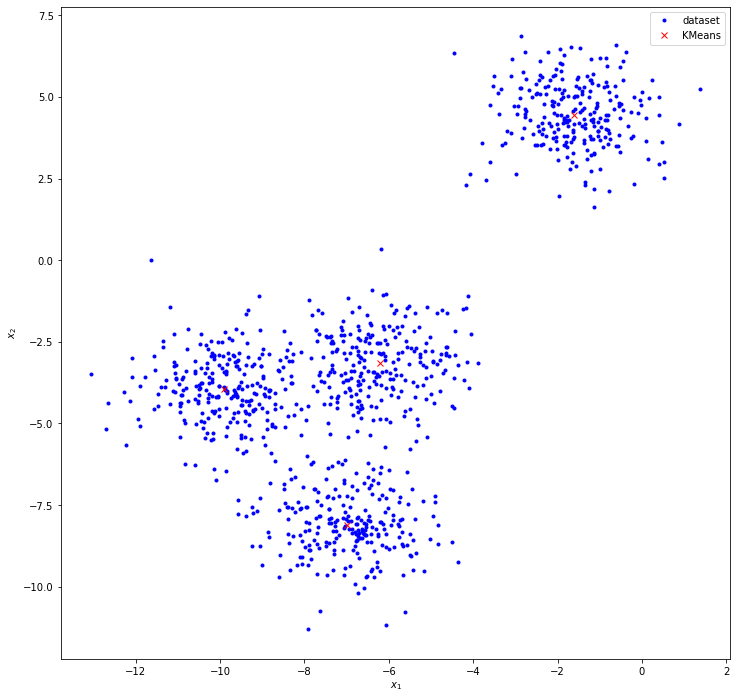

In [51]:
# Plotagem do dataset e os centróides:
fig = plt.figure(figsize=(12,12))
plt.plot(X[:,0], X[:,1], 'b.', label='dataset')
plt.plot(km.cluster_centers_[:,0], km.cluster_centers_[:,1], 'rx', label='KMeans')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.legend()
plt.show()

**E**. Utilizando o método da silhueta, encontre o(s) valor(es) mais apropriado(s) para k.

In [59]:
# Gerando um espaço para alocar os K's encontrados:
sil = []

# Definindo o valor máximo para K:
kmax = 10

# LOOP:
for k in range(2, kmax+1):
  kmeans = KMeans(n_clusters = k).fit(X)
  labels = kmeans.labels_
  sil.append(silhouette_score(X, labels, metric = 'euclidean'))

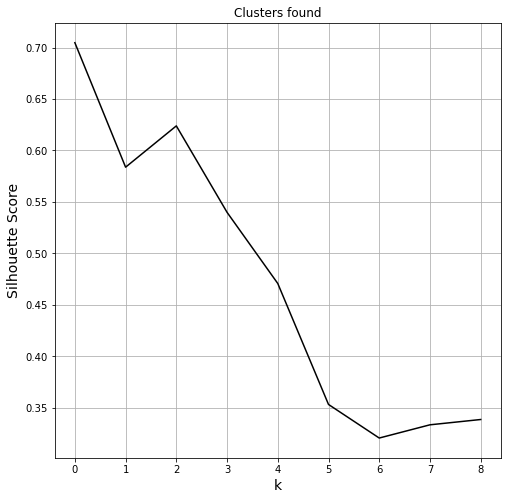

In [66]:
# Plotando os valores encontrados:
fig = plt.figure(figsize=(8,8))
plt.plot( sil,'black')
plt.title('Clusters found')
plt.xlabel('k', fontsize=14)
plt.ylabel('Silhouette Score', fontsize=14)
plt.grid()
plt.show()

**F**. Como(s) resultado(s) do método da silhueta, crie uma figura com os dados de treinamento indicando através de cores ou marcadores diferentes à que clusters cada um deles pertence além de mostrar os centróides encontrados pelo k-Means.

In [90]:
# Instânciando o KMeans:
km = KMeans(n_clusters=2)

# Treinando o modelo:
km.fit(X)

# Imprimindo os centroides:
# Imprimindo os resultados:
for i in range(0,2):    
    print('Centroid %d: (%1.2f, %1.2f)' % (i,km.cluster_centers_[i][0],
                                           km.cluster_centers_[i][1]))

Centroid 0: (-1.61, 4.46)
Centroid 1: (-7.74, -5.05)


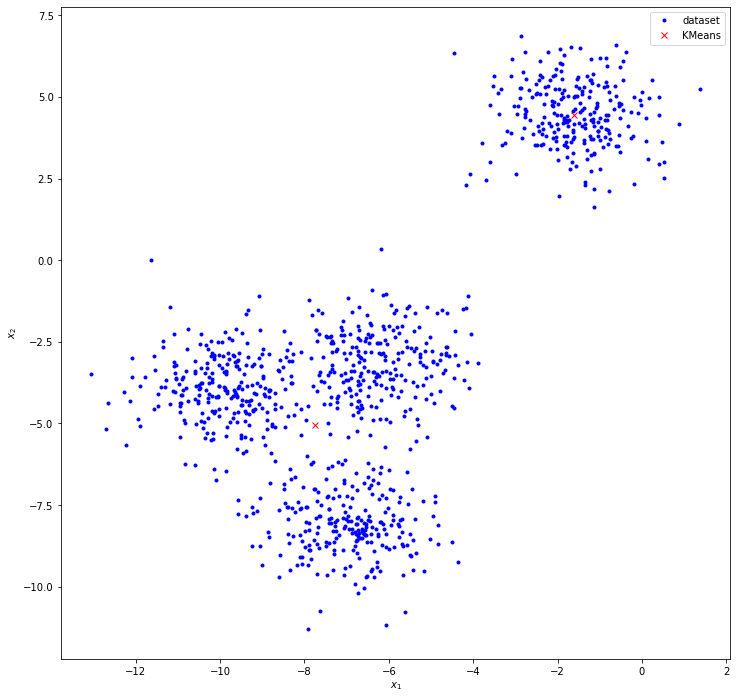

In [91]:
# Plotagem do dataset e os centróides:
fig = plt.figure(figsize=(12,12))
plt.plot(X[:,0], X[:,1], 'b.', label='dataset')
plt.plot(km.cluster_centers_[:,0], km.cluster_centers_[:,1], 'rx', label='KMeans')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.legend()
plt.show()